In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Prevents warnings from showing up, the warnings in this notebook have already been evaluated and can be ignored.
warnings.filterwarnings("ignore")

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
white_wine_data_df = pd.read_csv(
    "ResourcesNicksFile/winequality-white.csv")

# def convert_to_binary(value):
#     if value >= 6:
#         return 1
#     else:
#         return 0

# white_wine_data_df['quality'] = white_wine_data_df['quality'].apply(convert_to_binary)

# Review the DataFrame
white_wine_data_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [3]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = white_wine_data_df["quality"]

# Separate the X variable, the features
x = white_wine_data_df.drop(columns="quality")

In [4]:
# Review the y variable Series
y.head()

0    6
1    6
2    6
3    6
4    6
Name: quality, dtype: int64

In [5]:
# Review the X variable DataFrame
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [6]:
# Check the balance of our target values
y.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

---

# Model 1: Multiclass Logistic Regression (One Vs. Rest)


###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [7]:
# Split the data using train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, random_state=1,stratify=y)

# Instantiate the Logistic Regression model
classifier = LogisticRegression(solver = 'lbfgs', random_state=1, multi_class='ovr')

# Fit the model using training data
classifier.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [8]:
# Make a prediction using the testing data
predictions = classifier.predict(X_test)
predictions_df = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).value_counts()

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [9]:
# Print the balanced_accuracy score of the model
balanced_accuracy_score(y_test, predictions)

0.20068360211217356

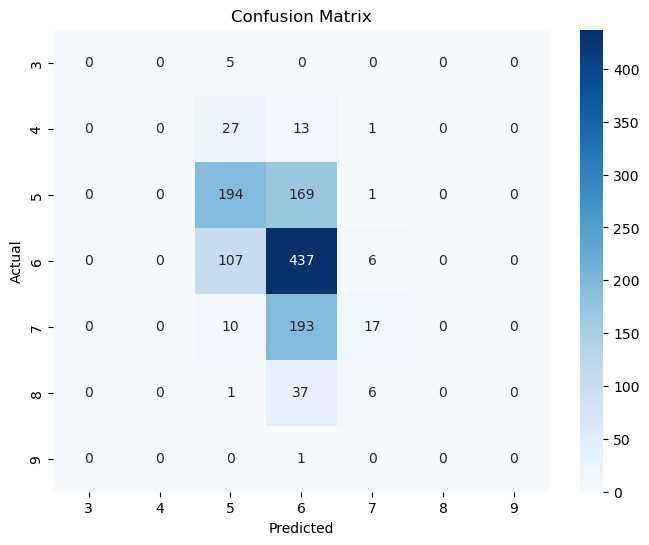

In [10]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["3","4","5","6","7","8","9"], yticklabels=["3","4","5","6","7","8","9"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [11]:
# Print the classification report for the model
target_names = ["9","8","7","6","5","4","3"]
print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

           9       0.00      0.00      0.00         5
           8       0.00      0.00      0.00        41
           7       0.56      0.53      0.55       364
           6       0.51      0.79      0.62       550
           5       0.55      0.08      0.14       220
           4       0.00      0.00      0.00        44
           3       0.00      0.00      0.00         1

    accuracy                           0.53      1225
   macro avg       0.23      0.20      0.19      1225
weighted avg       0.50      0.53      0.47      1225



### Multiclass Logistic Regression (One Vs. Rest) with Resampled Training Data

In [12]:
# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
ros = RandomOverSampler(random_state=1)

# Fit the original training data to the random_oversampler model
X_resampled, y_resampled = ros.fit_resample(x, y)

In [13]:
# Count the distinct values of the resampled labels data
y_resampled_df = pd.Series(y_resampled)
y_resampled_df.value_counts()

6    2198
5    2198
7    2198
8    2198
4    2198
3    2198
9    2198
Name: quality, dtype: int64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,random_state=1)
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifier_resampled = LogisticRegression(solver = 'lbfgs', random_state=1, multi_class='ovr')

# Fit the model using the resampled training data
classifier_resampled.fit(X_train, y_train)

# Make a prediction using the testing data
predictions_resampled = classifier_resampled.predict(X_test)

In [15]:
# Print the balanced_accuracy score of the model 
balanced_accuracy_score(y_test, predictions_resampled)

0.42178594685937304

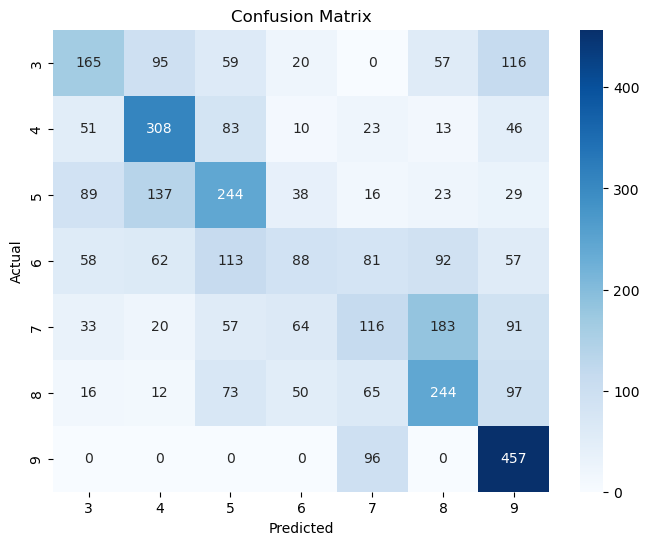

In [16]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions_resampled)
# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["3","4","5","6","7","8","9"], yticklabels=["3","4","5","6","7","8","9"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [17]:
# Print the classification report for the model
target_names = ["9","8","7","6","5","4","3"]
print(classification_report(y_test, predictions_resampled, target_names=target_names))

              precision    recall  f1-score   support

           9       0.40      0.32      0.36       512
           8       0.49      0.58      0.53       534
           7       0.39      0.42      0.40       576
           6       0.33      0.16      0.21       551
           5       0.29      0.21      0.24       564
           4       0.40      0.44      0.42       557
           3       0.51      0.83      0.63       553

    accuracy                           0.42      3847
   macro avg       0.40      0.42      0.40      3847
weighted avg       0.40      0.42      0.40      3847



---

# Model 2: MultinomialLogisticRegression (SoftMax)


###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [18]:
# Split the data using train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, random_state=1,stratify=y)

# Instantiate the Logistic Regression model
classifier = LogisticRegression(solver = 'lbfgs', random_state=1, multi_class='multinomial')

# Fit the model using training data
classifier.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [19]:
# Make a prediction using the testing data
predictions = classifier.predict(X_test)
predictions_df = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).value_counts()

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [20]:
# Print the balanced_accuracy score of the model
balanced_accuracy_score(y_test, predictions)

0.159607535321821

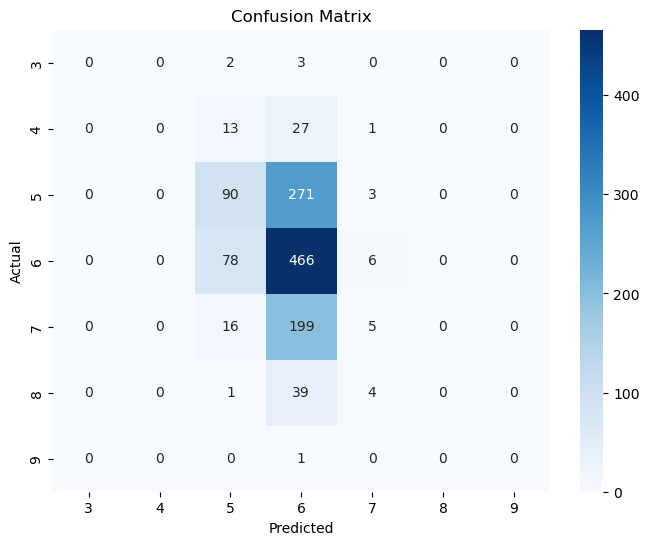

In [21]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["3","4","5","6","7","8","9"], yticklabels=["3","4","5","6","7","8","9"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [22]:
# Print the classification report for the model
target_names = ["9","8","7","6","5","4","3"]
print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

           9       0.00      0.00      0.00         5
           8       0.00      0.00      0.00        41
           7       0.45      0.25      0.32       364
           6       0.46      0.85      0.60       550
           5       0.26      0.02      0.04       220
           4       0.00      0.00      0.00        44
           3       0.00      0.00      0.00         1

    accuracy                           0.46      1225
   macro avg       0.17      0.16      0.14      1225
weighted avg       0.39      0.46      0.37      1225



### Multiclass Logistic Regression (One Vs. Rest) with Resampled Training Data

In [23]:
# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
ros = RandomOverSampler(random_state=1)

# Fit the original training data to the random_oversampler model
X_resampled, y_resampled = ros.fit_resample(x, y)

In [24]:
# Count the distinct values of the resampled labels data
y_resampled_df = pd.Series(y_resampled)
y_resampled_df.value_counts()

6    2198
5    2198
7    2198
8    2198
4    2198
3    2198
9    2198
Name: quality, dtype: int64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,random_state=1)
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifier_resampled = LogisticRegression(solver = 'lbfgs', random_state=1, multi_class='multinomial')

# Fit the model using the resampled training data
classifier_resampled.fit(X_train, y_train)

# Make a prediction using the testing data
predictions_resampled = classifier_resampled.predict(X_test)

In [26]:
# Print the balanced_accuracy score of the model 
balanced_accuracy_score(y_test, predictions_resampled)

0.3034230480911178

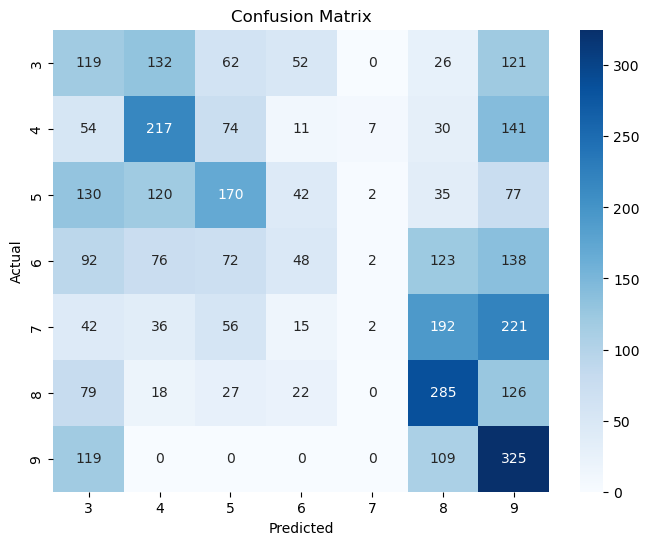

In [27]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions_resampled)
# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["3","4","5","6","7","8","9"], yticklabels=["3","4","5","6","7","8","9"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [28]:
# Print the classification report for the model
target_names = ["9","8","7","6","5","4","3"]
print(classification_report(y_test, predictions_resampled, target_names=target_names))

              precision    recall  f1-score   support

           9       0.19      0.23      0.21       512
           8       0.36      0.41      0.38       534
           7       0.37      0.30      0.33       576
           6       0.25      0.09      0.13       551
           5       0.15      0.00      0.01       564
           4       0.36      0.51      0.42       557
           3       0.28      0.59      0.38       553

    accuracy                           0.30      3847
   macro avg       0.28      0.30      0.27      3847
weighted avg       0.28      0.30      0.27      3847



---

# Model 3: Random Forest


###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [29]:
# Split the data using train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, random_state=1,stratify=y)

# Instantiate the Logistic Regression model
classifier = RandomForestClassifier(n_estimators=100, random_state=1)

# Fit the model using training data
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [30]:
# Make a prediction using the testing data
predictions = classifier.predict(X_test)
predictions_df = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).value_counts()

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [31]:
# Print the balanced_accuracy score of the model
balanced_accuracy_score(y_test, predictions)

0.3738121460421112

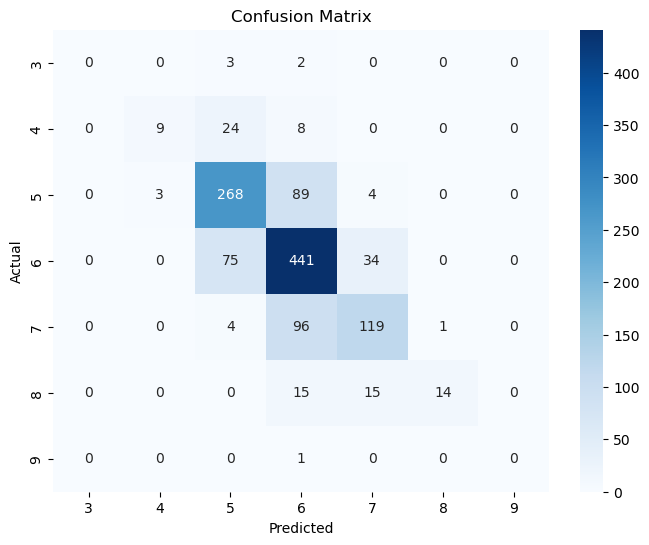

In [32]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["3","4","5","6","7","8","9"], yticklabels=["3","4","5","6","7","8","9"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [33]:
# Print the classification report for the model
target_names = ["9","8","7","6","5","4","3"]
print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

           9       0.00      0.00      0.00         5
           8       0.75      0.22      0.34        41
           7       0.72      0.74      0.73       364
           6       0.68      0.80      0.73       550
           5       0.69      0.54      0.61       220
           4       0.93      0.32      0.47        44
           3       0.00      0.00      0.00         1

    accuracy                           0.69      1225
   macro avg       0.54      0.37      0.41      1225
weighted avg       0.70      0.69      0.68      1225



### Evaluating again with Resampled Training Data

In [34]:
# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
ros = RandomOverSampler(random_state=1)

# Fit the original training data to the random_oversampler model
X_resampled, y_resampled = ros.fit_resample(x, y)

In [35]:
# Count the distinct values of the resampled labels data
y_resampled_df = pd.Series(y_resampled)
y_resampled_df.value_counts()

6    2198
5    2198
7    2198
8    2198
4    2198
3    2198
9    2198
Name: quality, dtype: int64

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,random_state=1)
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifier_resampled = RandomForestClassifier(n_estimators=100, random_state=1)

# Fit the model using the resampled training data
classifier_resampled.fit(X_train, y_train)

# Make a prediction using the testing data
predictions_resampled = classifier_resampled.predict(X_test)

pd.DataFrame({"Prediction": predictions_resampled, "Actual": y_test}).value_counts()

Prediction  Actual
8           8         557
9           9         553
4           4         534
7           7         529
3           3         512
5           5         487
6           6         391
5           6          88
6           5          77
7           6          64
6           7          31
7           5           5
4           6           5
            5           5
8           6           3
            7           3
3           5           2
5           7           1
dtype: int64

In [37]:
# Print the balanced_accuracy score of the model 
balanced_accuracy_score(y_test, predictions_resampled)

0.9275783211850854

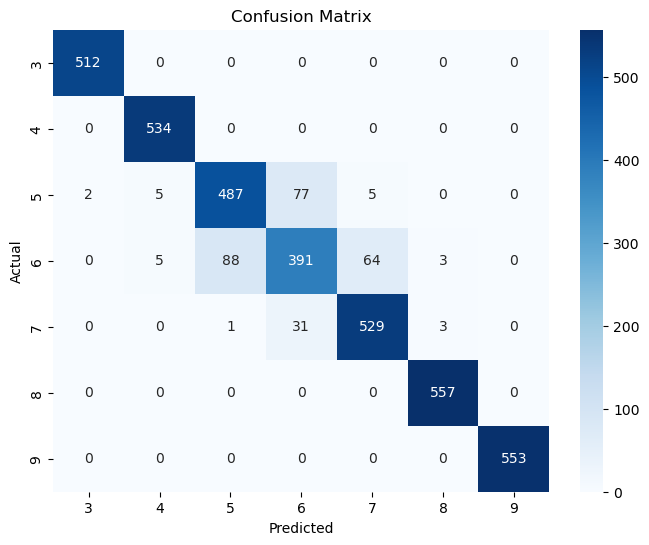

In [38]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions_resampled)
# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["3","4","5","6","7","8","9"], yticklabels=["3","4","5","6","7","8","9"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [39]:
# Print the classification report for the model
target_names = ["9","8","7","6","5","4","3"]
print(classification_report(y_test, predictions_resampled, target_names=target_names))

              precision    recall  f1-score   support

           9       1.00      1.00      1.00       512
           8       0.98      1.00      0.99       534
           7       0.85      0.85      0.85       576
           6       0.78      0.71      0.74       551
           5       0.88      0.94      0.91       564
           4       0.99      1.00      0.99       557
           3       1.00      1.00      1.00       553

    accuracy                           0.93      3847
   macro avg       0.93      0.93      0.93      3847
weighted avg       0.92      0.93      0.92      3847



### Figure: Feature Importance for best model: Random Forest without RandomOverSampling

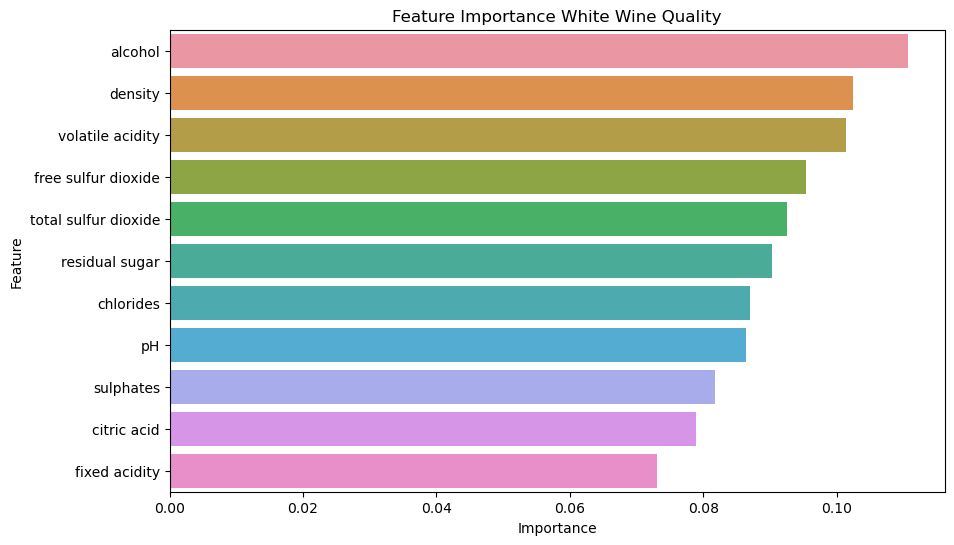

In [41]:
# Calculate feature importances (absolute values of coefficients)
feature_importances = pd.DataFrame({'feature': x.columns, 'importance': np.abs(classifier.feature_importances_)})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance White Wine Quality')
plt.show()